<a href="https://colab.research.google.com/github/nunocesarsa/GoogleColab_public/blob/master/NEON_Crop_Sentinel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading gee and drive

In [0]:
import ee

In [0]:
#then we need to authenticate

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=xmxbgCG5ukjf9coSiYGCC2hFSgF38W-ZdL8PCA2c17o&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/ywG1Y_x12LqiEU08Ml2qU9CzS4ep3zcbXdimzY1JfvoaJ8F0TEXeEaY

Successfully saved authorization token.


In [0]:
#then we need to authenticate in google drive also so we can upload our download there

from google.colab import drive
drive.mount('/content/drive')
#Perhaps this step can be skipped by saving directly to the workspace

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


First, getting the points from the polygon

In [0]:
!pip install geopandas

import geopandas as gpd

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 10.4MB 17.0MB/s 
     |████████████████████████████████| 14.7MB 303kB/s 


In [0]:

all_ply = gpd.read_file("/content/drive/My Drive/Neon/CustomShape/Comb_FddLMAChl_Centroids_1PtPerLoc_USAonly_Poly.shp")
all_pts = gpd.read_file("/content/drive/My Drive/Neon/CustomShape/Comb_FddLMAChl_Centroids_1PtPerLoc_USAonly.shp")

import pandas as pd
all_pts_csv = pd.read_csv("/content/drive/My Drive/Neon/CustomShape/Comb_FddLMAChl_1PtPerLoc_USAonly.csv",sep=";",decimal=",")


#https://gis.stackexchange.com/questions/333791/accessing-a-shapefile-with-googleearthengine-api-invalid-geojson-geometry
#selecting a single polygong
#clip_poly = ee.Feature(eval(sel_ply.to_json())['features'][0])
#geojsonDict = jsonDict['features'][0]

all_pts = all_pts[all_pts["Year"]=='2019']
all_pts
all_pts_csv_2019 = all_pts_csv[all_pts_csv["Year"]==2019]
all_pts_csv_2019

,rowid,sampleID,Date_Col,siteID,plotID,subPlotID,Tag_Chl,Tag_lma,Tag_fdd,Chl_fM,Chl_a,Chl_b,Chl_car,LMA_fM,LMA_dM,LMA_nleaf,LMA_LA,LMA_LMA,LMA_dMfrac,fdd_nlcd,fdd_dLat,fdd_dLon,fdd_sampty,fdd_taxonI,fdd_specie,Year,Mont,Daym,ID_Field,coords.x1,coords.x2
54,55,NaN,03/09/2019,JERC,JERC_003,31.0,1,1,1,0.082800,18.752500,5.780000,4.815000,5.367750,3.155000,21.250000,27411.525000,111.650000,0.606500,2,31.196150,-84.473242,NaN,NaN,NaN,2019,9,3,JERC_003_31_20190903,-84.473242,31.196150
55,56,NaN,03/09/2019,JERC,JERC_007,39.0,1,1,1,0.181167,19.670000,6.056667,5.493333,4.350667,2.411000,13.333333,17293.000000,169.266667,0.585000,4,31.198631,-84.476311,NaN,NaN,NaN,2019,9,3,JERC_007_39_20190903,-84.476311,31.198631
56,57,NaN,04/09/2019,JERC,JERC_014,31.0,1,1,1,0.107500,11.020000,3.090000,3.650000,2.549000,0.597000,10.000000,15630.100000,38.200000,0.234000,1,31.200072,-84.454914,NaN,NaN,NaN,2019,9,4,JERC_014_31_20190904,-84.454914,31.200072
57,58,NaN,04/09/2019,JERC,JERC_012,31.0,1,1,1,0.144900,32.450000,10.670000,7.850000,0.469000,0.245000,21.000000,4860.300000,50.400000,0.522000,1,31.190203,-84.447296,NaN,NaN,NaN,2019,9,4,JERC_012_31_20190904,-84.447296,31.190203
58,59,NaN,04/09/2019,JERC,JERC_006,31.0,1,1,1,0.108200,21.500000,5.890000,5.370000,3.689000,2.218000,12.000000,18135.100000,122.300000,0.601000,6,31.187672,-84.455851,NaN,NaN,NaN,2019,9,4,JERC_006_31_20190904,-84.455851,31.187672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,406,NaN,03/04/2019,SJER,SJER_015,NaN,1,1,1,0.059550,10.275000,3.205000,3.115000,2.022500,0.490000,14.500000,9448.200000,47.950000,0.229000,5,37.081978,-119.720355,NaN,NaN,NaN,2019,4,3,SJER_015_NA_20190403,-119.720355,37.081978
406,407,NaN,03/04/2019,SJER,SJER_003,NaN,1,1,1,0.083200,10.880000,3.100000,3.930000,1.024000,0.480000,16.000000,7462.500000,64.300000,0.469000,4,37.116632,-119.730379,NaN,NaN,NaN,2019,4,3,SJER_003_NA_20190403,-119.730379,37.116632
407,408,NaN,04/04/2019,SJER,SJER_026,31.0,1,1,1,0.080150,11.320000,3.330000,2.860000,1.846000,0.655000,28.000000,5869.350000,106.900000,0.314500,8,37.101235,-119.729168,NaN,NaN,NaN,2019,4,4,SJER_026_31_20190404,-119.729168,37.101235
408,409,NaN,04/04/2019,SJER,SJER_008,NaN,1,1,1,0.066900,10.886667,3.283333,3.076667,1.575333,0.823333,17.333333,6296.633333,161.000000,0.522667,4,37.107459,-119.717535,NaN,NaN,NaN,2019,4,4,SJER_008_NA_20190404,-119.717535,37.107459


,SP_ID,ID,geometry
5,6,6,"POLYGON ((-72.22774 42.42909, -72.22774 42.425..."


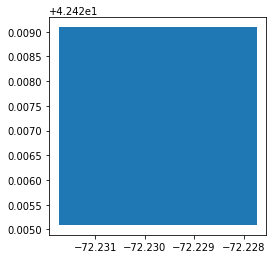

In [0]:
#selecting the first row
sel_ply = all_ply[5:6]
sel_ply.plot()
sel_ply.head()

Selecting row: 56


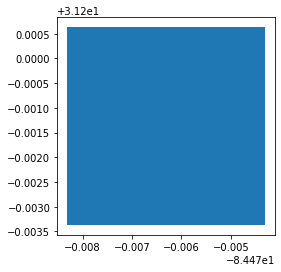

In [0]:
#selecting a given row based on the pts pandas

print("Selecting row: " + str(int(all_pts['rowid'].iloc[1])) )
row_t = int(all_pts['rowid'].iloc[0])
sel_ply = all_ply[row_t:(row_t+1)]
sel_ply.plot()

In [0]:

#creating a function for extracting coordinates from pandas shapefile
def coords_from_gpd(poly):
  return eval(poly.to_json())['features'][0]['geometry']['coordinates']

clip_poly = ee.Geometry.Polygon(coords_from_gpd(sel_ply))
clip_poly

#testing the method for taking dates from the data 




In [0]:
sel_pts = all_pts_csv.iloc[0]
sel_pts["Year"]
sel_pts["Mont"]
day_i = 1

ini_date = str(sel_pts["Year"])+"-"+str(sel_pts["Mont"])+"-"+str(day_i)
print(ini_date)
fin_date = str(sel_pts["Year"])+"-"+str(sel_pts["Mont"]+1)+"-"+str(day_i)
print(fin_date)

#Following this discussion https://forum.step.esa.int/t/sentinel-2-assets-available-in-google-earth-engine/1808/38 
#Data in GEE only becomes more widely available in the GEE dataset after 2019 (data processed to SR)

ini_date = '2018-9-1'

2019-9-1
2019-10-1


#Test plot

In [0]:
#Testing the above
# it is quite COMPLEX to use the s2 filters in python
s2_collection = (ee.ImageCollection("COPERNICUS/S2_SR") #selects the S2 Surface reflectance product in GEE
                 .select(['B2','B3','B4',
                          'B5','B6','B7',
                          'B8A','B11','B12']) #selects the bands of interest
                 .filter(ee.Filter.date('2017-9-1','2017-10-1')) #filtes on the time
                 .filterBounds(clip_poly) #filters on the Aoi
                 .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE',1)))

count = s2_collection.size()
print('Nr of images in collection: ', str(count.getInfo())+'\n')

##here is where you select the image
mid_step = s2_collection.toList(count)
s2_img = ee.Image(mid_step.get(0))

#print(mid_step)

# #first step now is to then generate a s2 image cropped to our aoi, and for information i will also plot it on the map

# # Import the Folium library. This library is to assist in visualizations
# import folium

# # Import the Image function from the IPython.display module. 
# from IPython.display import Image

# #the next code snippet i stole from someone
# # Define a method for displaying Earth Engine image tiles to folium map.
# def add_ee_layer(self, ee_image_object, vis_params, name):
  
#   map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
#   folium.raster_layers.TileLayer(
#     tiles = map_id_dict['tile_fetcher'].url_format,
#     attr = 'Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
#     name = name,
#     overlay = True,
#     control = True
#   ).add_to(self)

# # Add EE drawing method to folium.
# folium.Map.add_ee_layer = add_ee_layer

# # Set visualization parameters.
# visParams = {"bands": ['B4', 'B3', 'B2'],"gain": '0.1, 0.1, 0.1',"scale":20}

# # Create a folium map object.
# my_map = folium.Map(location=[52.4500, 5.35], zoom_start=12) #this had to be tried one by one... feels daft

# # Add the elevation model to the map object.
# my_map.add_ee_layer(s2_img, visParams, 'DEM')

# # Add a layer control panel to the map.
# my_map.add_child(folium.LayerControl())

# # Display the map.
# display(my_map)

#s2_img.getInfo()

Nr of images in collection:  0



In [0]:
s2_img.getInfo()

#creating a function to store metadata
def calc_metrics(Poly_ID,Date_S2,MeanSolAzi,MeanSolZen,MeanSatAzi,MeanSatZen):

  out_list = {"Poly_ID":Poly_ID,
              "Date_S2":Date_S2,
              "MeanSolAzi":MeanSolAzi,
              "MeanSolZen":MeanSolZen,
              "MeanSatAzi":MeanSatAzi,
              "MeanSatZen":MeanSatZen,}

  return out_list

#function for calculating the mean of the incidence angles

def calc_mean_inc_angles(ee_s2img,variable):
  band_list = ['B2','B3','B4','B5','B6','B7','B8A','B11','B12'] #this can be obvioulsy be one of the function inputs
  mean_scaler = 0
  ee_s2img = ee_s2img.getInfo()
  for i in band_list:
    #print('MEAN_INCIDENCE_AZIMUTH_ANGLE_'+i)
    #print(s2_img_meta.get('properties',{}).get('MEAN_INCIDENCE_AZIMUTH_ANGLE_'+i))
    mean_scaler = mean_scaler + ee_s2img.get('properties',{}).get(variable+i)/len(band_list)

  return mean_scaler

print(calc_mean_inc_angles(s2_img,'MEAN_INCIDENCE_AZIMUTH_ANGLE_'))
print(calc_mean_inc_angles(s2_img,'MEAN_INCIDENCE_ZENITH_ANGLE_'))

284.61084684166667
9.936084362456667


Ok, now its possible to loop and select 

In [0]:
#create 




In [0]:


row_t = all_pts['rowid'].iloc[:]

k = 1
for i in row_t: #iterating on selected rows
  print(int(i))
  sel_ply = all_ply[int(i):int((i+1))]
  #print(sel_ply) #ucomment if you want to see the id of each polygon
  #creating the polygon for clipping
  clip_poly = ee.Geometry.Polygon(coords_from_gpd(sel_ply))

  #fetching init date
  sel_pts = all_pts_csv.iloc[int(i)]
  ini_date = str(sel_pts["Year"])+"-"+str(sel_pts["Mont"])+"-"+str(day_i)
  #print(ini_date)
  fin_date = str(sel_pts["Year"])+"-"+str(sel_pts["Mont"]+1)+"-"+str(day_i)
  #print(fin_date)

  #searches the collection... will skip if no image is found
  s2_collection = s2_collection = (ee.ImageCollection("COPERNICUS/S2_SR") #selects the S2 Surface reflectance product in GEE
                 .select(['B2','B3','B4',
                          'B5','B6','B7',
                          'B8A','B11','B12']) #selects the bands of interest
                 .filter(ee.Filter.date(ini_date,fin_date)) #filtes on the time
                 .filterBounds(clip_poly) #filters on the Aoi
                 .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE',25)))
  
  count = s2_collection.size()




  if  count.getInfo() > 0:
    #print(count, " images found for polygon ",i," between dates ", ini_date , " ", fin_date)
    

    mid_step = s2_collection.toList(count)
    s2_img = ee.Image(mid_step.get(0))
    s2_img_meta = s2_img.getInfo()

    #filename save
    img_date = ee.Date(s2_img_meta.get('properties',{}).get('system:time_start')).format("YYYY_MM_dd").getInfo()
    filename = "Poly_"+str(int(i)+1)+"_"+img_date

    print(filename)
 
    task_config = {
      'image': s2_img,
      'fileFormat': 'GeoTIFF',
      'folder': 'Neon_Clips',
      'fileNamePrefix': filename,
      'description': "clipped area",
      'scale':30,
      'region':clip_poly 
    }

    task = ee.batch.Export.image.toDrive(**task_config )
    task.start()

    flag = task.status()['state']

    while flag != 'COMPLETED':
      flag = task.status()['state']
      #print(k,flag)
      if flag == 'FAILED':

        print("ROWID",k, "GEE task failed")
        flag = 'COMPLETED'

      k = k+1


  else:
    print("No image found for polygon ",i," between dates ", ini_date , " ", fin_date)








55
Poly_56_2019_09_04
56
Poly_57_2019_09_04
57
Poly_58_2019_09_04
58
Poly_59_2019_09_04
59
Poly_60_2019_09_04
60
Poly_61_2019_09_04
61
Poly_62_2019_09_04
62
Poly_63_2019_09_04
63
Poly_64_2019_09_04
64
Poly_65_2019_09_04
65
Poly_66_2019_09_04
66
Poly_67_2019_09_04
67
Poly_68_2019_09_04
68
Poly_69_2019_09_04
69
Poly_70_2019_09_04
70
Poly_71_2019_09_04
71
Poly_72_2019_09_04
72
Poly_73_2019_09_04
73
Poly_74_2019_09_04
74
Poly_75_2019_09_04
75
Poly_76_2019_09_04
76
No image found for polygon  76.0  between dates  2017-8-1   2017-9-1
91
Poly_92_2019_06_01
92
Poly_93_2019_06_01
93
Poly_94_2019_06_01
94
Poly_95_2019_06_01
95
Poly_96_2019_06_01
96
Poly_97_2019_06_01
97
Poly_98_2019_06_01
98
Poly_99_2019_06_01
99
Poly_100_2019_06_01
100
Poly_101_2019_06_01
101
Poly_102_2019_06_01
102
Poly_103_2019_06_01
103
Poly_104_2019_06_01
104
Poly_105_2019_06_01
105
Poly_106_2019_06_01
106
Poly_107_2019_06_01
107
Poly_108_2019_06_01
108
Poly_109_2019_06_01
109
Poly_110_2019_06_01
110
Poly_111_2019_07_09
111

In [0]:
ee.Date(s2_img_meta.get('properties',{}).get('system:time_start')).format("YYYY_MM_dd").getInfo()

'2019_09_04'

In [0]:
count = s2_collection.size()

In [0]:
print(all_ply.shape)

out_fld = "/content/drive/My Drive/Neon/CustomShape_Clips"


row_t = int(all_pts['rowid'].iloc[:])
sel_ply = all_ply[row_t:(row_t+1)]




k = 1
for i in range(all_ply.shape[0]):#[0]:#
  print("Processing feature nr:",i+1)
  sel_ply = all_ply[i:(i+1)]
  print(sel_ply)

  clip_poly = ee.Geometry.Polygon(coords_from_gpd(sel_ply))

  filename = "Poly_"+str(i+1)

  task_config = {
    'image': s2_img,
    'fileFormat': 'GeoTIFF',
    'folder': 'Neon_Clips',
    'fileNamePrefix': filename,
    'description': "clipped area",
    'scale':30,
    'region':clip_poly 
  }


  # task = ee.batch.Export.image.toDrive(**task_config )
  # task.start()

  # flag = task.status()['state']

  # while flag != 'COMPLETED':
  #   flag = task.status()['state']
  #   #print(k,flag)
  #   if flag == 'FAILED':

  #     print("ROWID",k, "GEE task failed")
  #     flag = 'COMPLETED'

  #   k = k+1
    

    









(424, 3)
Processing feature nr: 1
  SP_ID  ID                                           geometry
0     1   1  POLYGON ((-72.17361 42.54031, -72.17361 42.536...
Processing feature nr: 2
  SP_ID  ID                                           geometry
1     2   2  POLYGON ((-72.17609 42.54197, -72.17609 42.537...
Processing feature nr: 3
  SP_ID  ID                                           geometry
2     3   3  POLYGON ((-72.17732 42.53932, -72.17732 42.535...
Processing feature nr: 4
  SP_ID  ID                                           geometry
3     4   4  POLYGON ((-72.25261 42.39429, -72.25261 42.390...
Processing feature nr: 5
  SP_ID  ID                                           geometry
4     5   5  POLYGON ((-72.25172 42.40510, -72.25172 42.401...
Processing feature nr: 6
  SP_ID  ID                                           geometry
5     6   6  POLYGON ((-72.22774 42.42909, -72.22774 42.425...
Processing feature nr: 7
  SP_ID  ID                                           geomet

In [0]:
task.status()['state']

'COMPLETED'

In [0]:
flag != 'COMPLETED'
task.status()['state'] != 'COMPLETED'

False